In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_diseased = pd.read_csv("PD.csv")
df_healthy = pd.read_csv("Healthy.csv")

# Add a label column: '1' for diseased, '0' for healthy
df_diseased['Label'] = 1
df_healthy['Label'] = 0

# Combine the datasets into one DataFrame
combined_df = pd.concat([df_diseased, df_healthy], ignore_index=True)

In [3]:
missing_values_count = combined_df.isnull().sum()
print("Missing values in each column:\n", missing_values_count)

Missing values in each column:
 Time(sec)            0
VGRF_left_s1         0
VGRF_left_s2         0
VGRF_left_s3         0
VGRF_left_s4         0
VGRF_left_s5         0
VGRF_left_s6         0
VGRF_left_s7         0
VGRF_left_s8         0
VGRF_right_s1        0
VGRF_right_s2        0
VGRF_right_s3        0
VGRF_right_s4        0
VGRF_right_s5        0
VGRF_right_s6        0
VGRF_right_s7        0
VGRF_right_s8        0
Total_force_left     0
Total_force_right    0
Label                0
dtype: int64


In [5]:
combined_df.head()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right,Label
0,0.01,71.72,174.90,135.96,83.38,30.14,64.57,84.04,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,679.91,0.0,1
1,0.02,71.72,173.25,134.31,84.92,31.68,64.57,87.78,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.43,0.0,1
2,0.03,68.53,169.84,132.55,86.46,31.68,67.43,87.78,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.87,0.0,1
3,0.04,65.34,168.19,132.55,86.46,31.68,67.43,91.52,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,682.77,0.0,1
4,0.05,62.15,165.00,129.03,88.11,31.68,70.40,95.26,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.23,0.0,1


In [4]:
duplicates_count = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")


Number of duplicate rows: 20293


In [19]:
combined_df["Label"].value_counts()

Label
1    2304504
0    1012740
Name: count, dtype: int64

In [6]:
df = combined_df.drop_duplicates()

In [21]:
df["Label"].value_counts()

Label
1    1619827
0     698502
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2318329 entries, 0 to 3317243
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Time(sec)          float64
 1   VGRF_left_s1       float64
 2   VGRF_left_s2       float64
 3   VGRF_left_s3       float64
 4   VGRF_left_s4       float64
 5   VGRF_left_s5       float64
 6   VGRF_left_s6       float64
 7   VGRF_left_s7       float64
 8   VGRF_left_s8       float64
 9   VGRF_right_s1      float64
 10  VGRF_right_s2      float64
 11  VGRF_right_s3      float64
 12  VGRF_right_s4      float64
 13  VGRF_right_s5      float64
 14  VGRF_right_s6      float64
 15  VGRF_right_s7      float64
 16  VGRF_right_s8      float64
 17  Total_force_left   float64
 18  Total_force_right  float64
 19  Label              int64  
dtypes: float64(19), int64(1)
memory usage: 371.4 MB


In [29]:
df.describe()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right,Label
count,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06,2.318329e+06
mean,5.710318e+01,6.871814e+01,5.727495e+01,4.646471e+01,5.770915e+01,2.865023e+01,6.244658e+01,7.117469e+01,3.027684e+01,7.153844e+01,6.039752e+01,5.075789e+01,6.662686e+01,2.886567e+01,6.429696e+01,7.110785e+01,3.630525e+01,4.227153e+02,4.498964e+02,6.987045e-01
std,3.527502e+01,1.001866e+02,7.845274e+01,6.482144e+01,7.174822e+01,3.981768e+01,7.582732e+01,8.731862e+01,3.692551e+01,1.033552e+02,7.953552e+01,6.954041e+01,7.871508e+01,3.929161e+01,7.620116e+01,8.681521e+01,4.284935e+01,3.898327e+02,3.967138e+02,4.588209e-01
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.710810e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.463620e+01,9.240000e+00,4.840000e+00,2.750000e+00,1.980000e+01,8.140000e+00,2.398000e+01,2.926000e+01,1.793000e+01,1.133000e+01,7.150000e+00,5.060000e+00,3.300000e+01,1.056000e+01,3.014000e+01,3.146000e+01,2.255000e+01,4.580400e+02,5.226100e+02,1.000000e+00
75%,8.471410e+01,1.203400e+02,1.130800e+02,8.877000e+01,1.023000e+02,4.554000e+01,1.130800e+02,1.243000e+02,4.840000e+01,1.234200e+02,1.155000e+02,9.482000e+01,1.213300e+02,4.444000e+01,1.140700e+02,1.217700e+02,5.797000e+01,7.928800e+02,8.163100e+02,1.000000e+00
max,1.625486e+02,3.696000e+02,2.967800e+02,2.492600e+02,2.833600e+02,1.624700e+02,2.979900e+02,3.425400e+02,1.565300e+02,3.748800e+02,2.982100e+02,2.626800e+02,3.061300e+02,1.600500e+02,2.953500e+02,3.448500e+02,1.728100e+02,1.489290e+03,1.638670e+03,1.000000e+00


In [8]:
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Display the cleaned dataset
print("Cleaned dataset:\n")
df.head()

Cleaned dataset:



,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right,Label
0,0.01,71.72,174.90,135.96,83.38,30.14,64.57,84.04,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,679.91,0.0,1
1,0.02,71.72,173.25,134.31,84.92,31.68,64.57,87.78,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.43,0.0,1
2,0.03,68.53,169.84,132.55,86.46,31.68,67.43,87.78,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.87,0.0,1
3,0.04,65.34,168.19,132.55,86.46,31.68,67.43,91.52,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,682.77,0.0,1
4,0.05,62.15,165.00,129.03,88.11,31.68,70.40,95.26,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.23,0.0,1


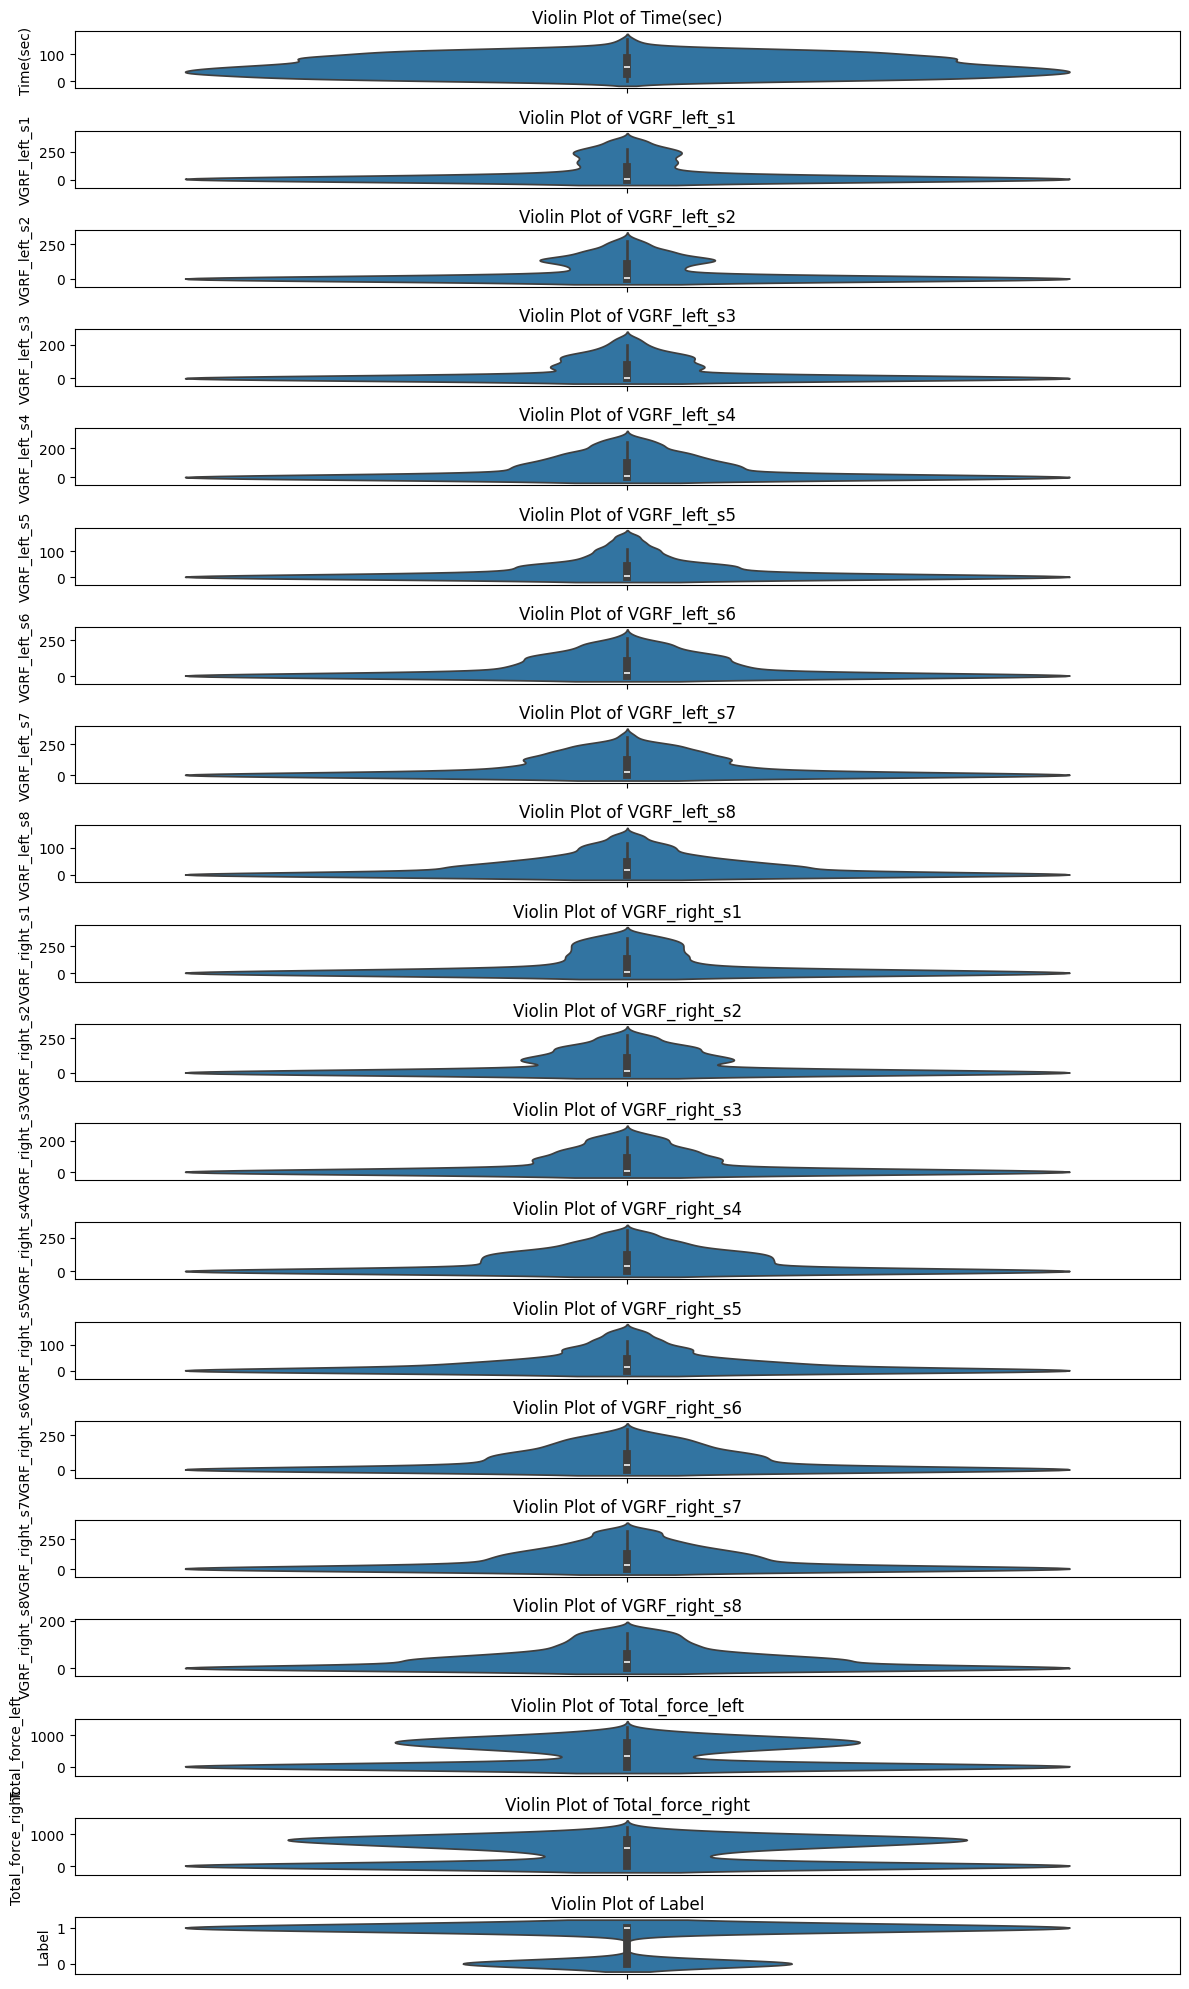

In [25]:
# Use a subset or sample for plotting if needed
sample_df = df.sample(n=1000, random_state=42)

# Select only numeric columns
numeric_df = sample_df.select_dtypes(include=[float, int])

# Plot violin plots for each numeric column
plt.figure(figsize=(12, 20))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns), 1, i)
    sns.violinplot(data=numeric_df[column])
    plt.title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()

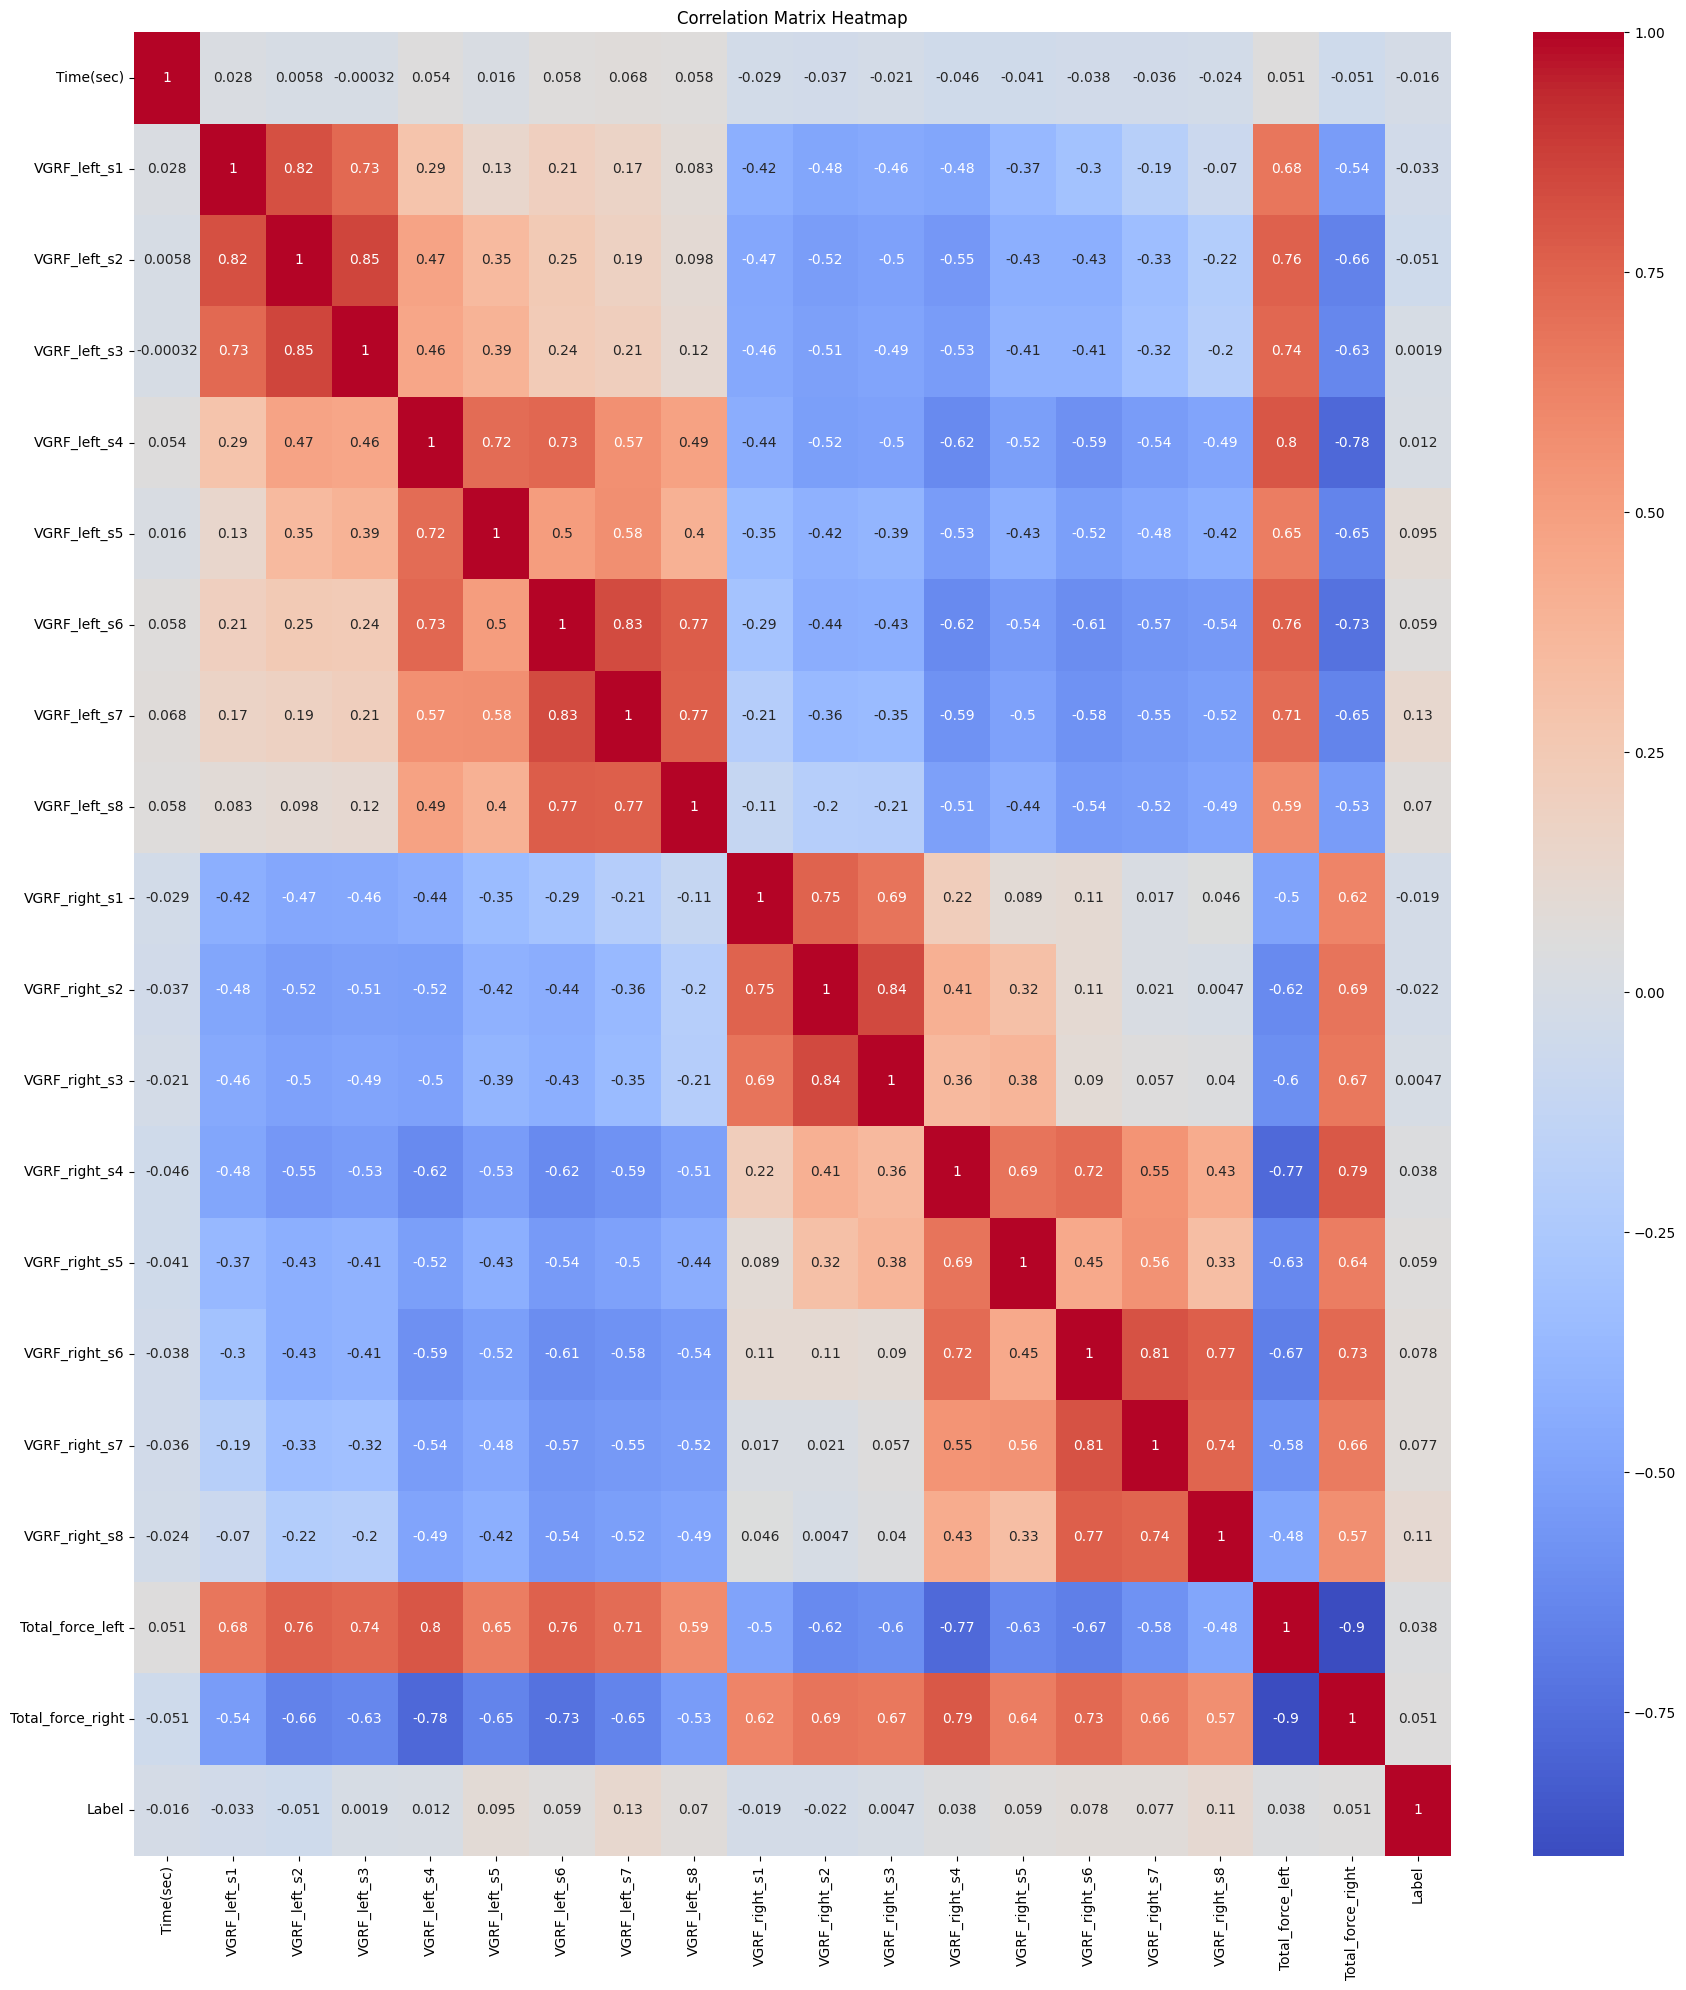

In [34]:
correlation_matrix = sample_df.corr()
plt.figure(figsize=(18, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

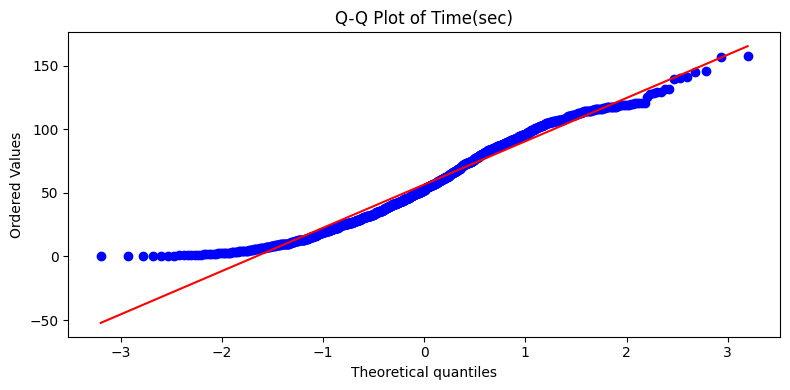

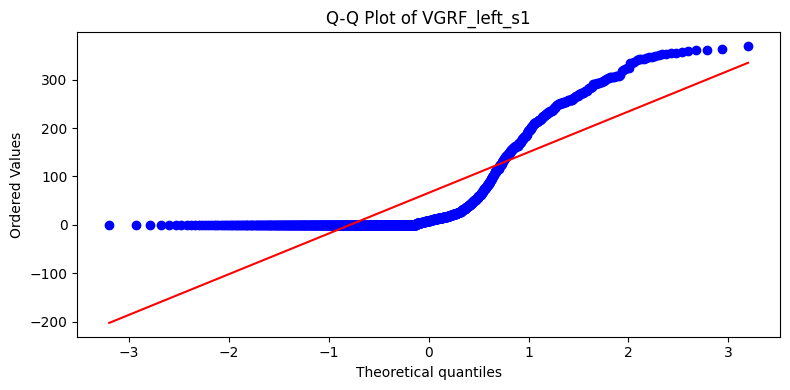

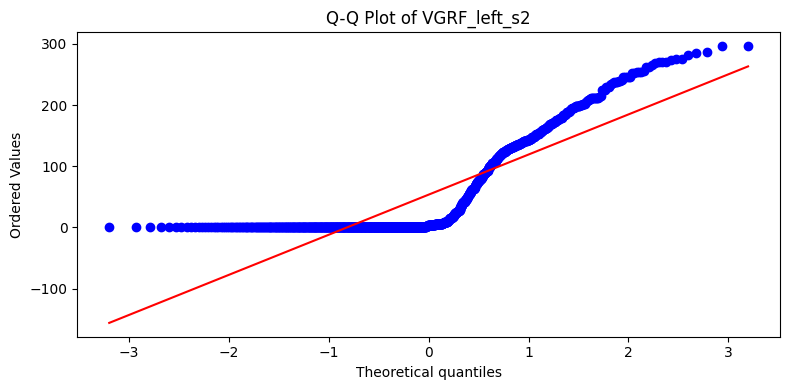

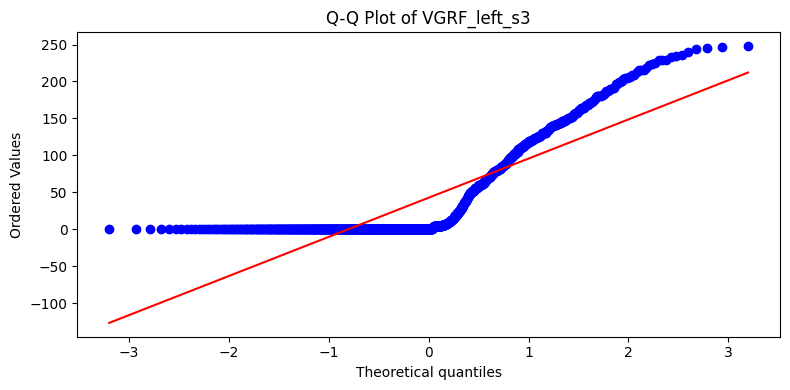

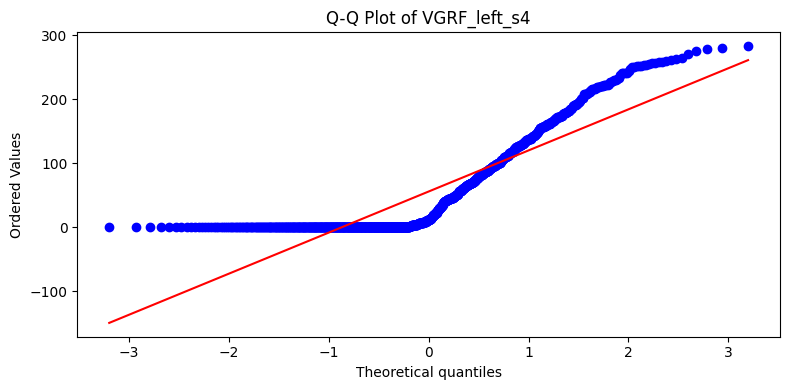

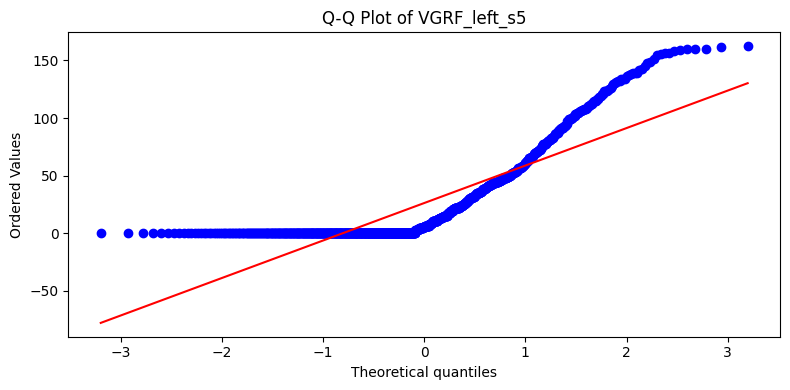

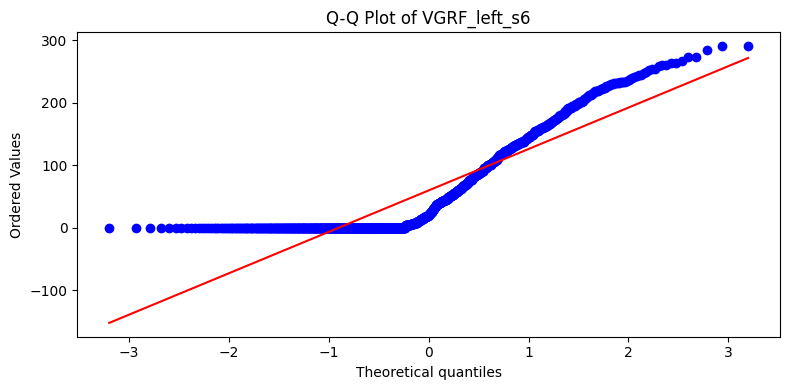

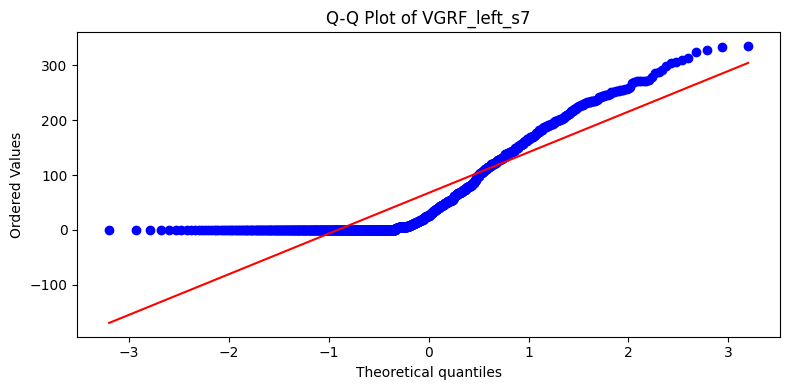

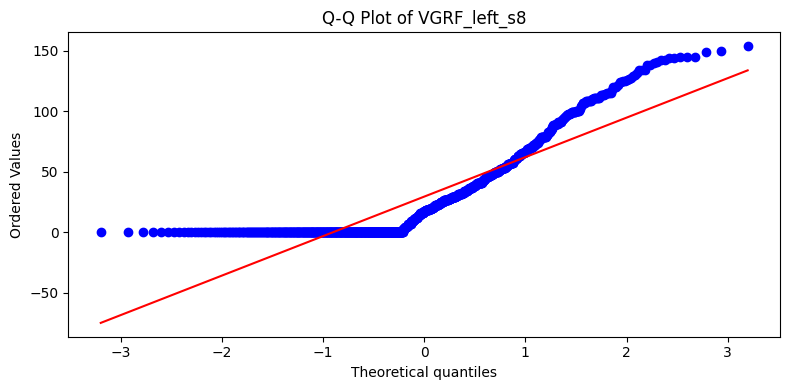

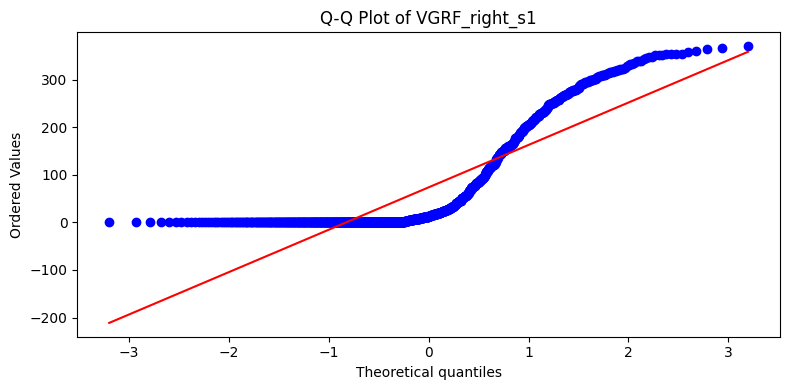

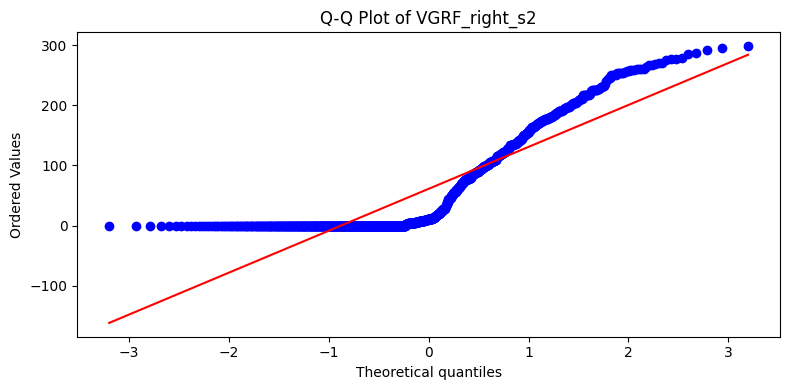

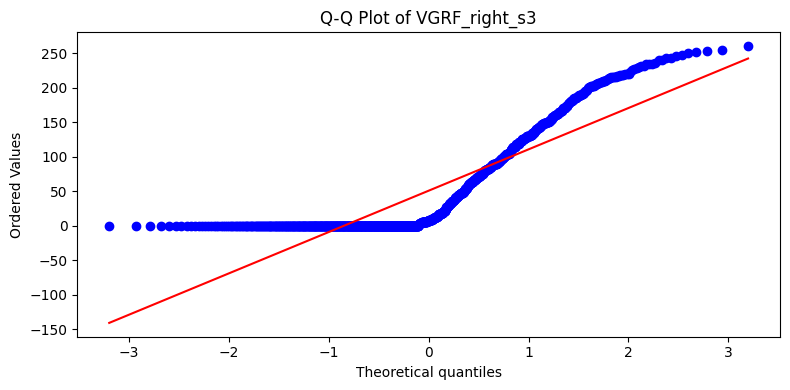

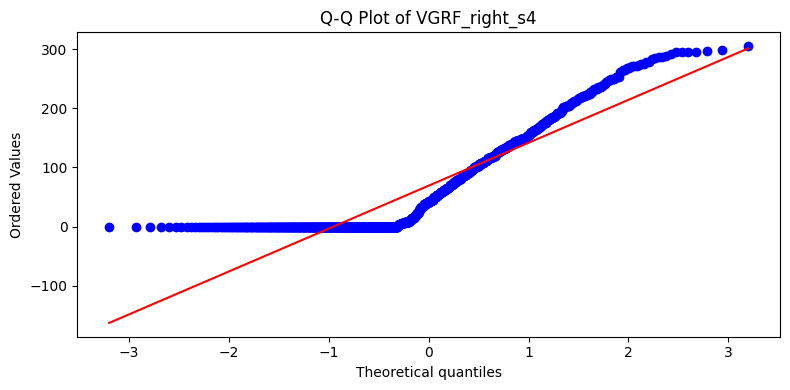

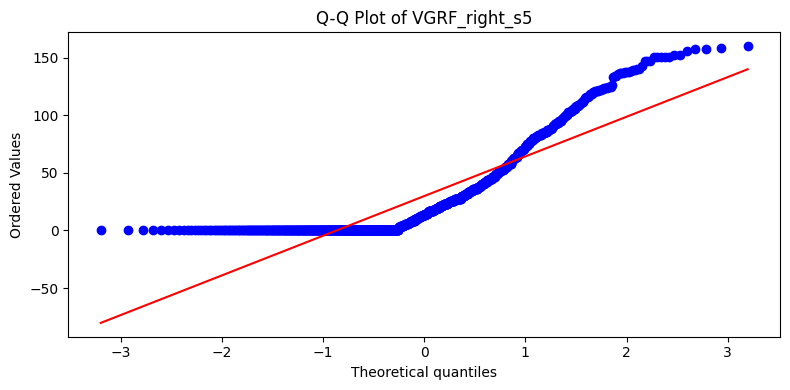

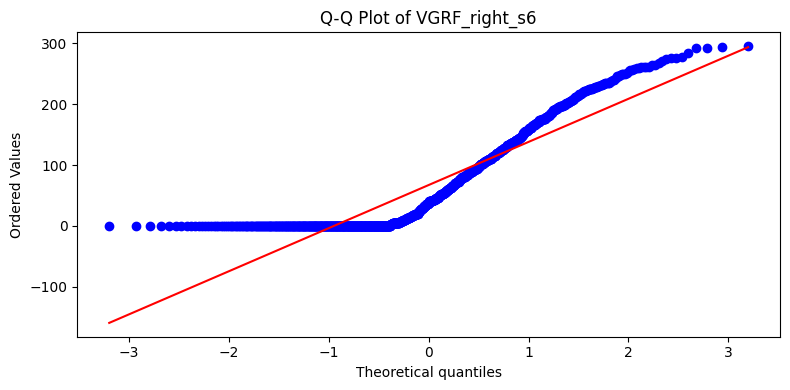

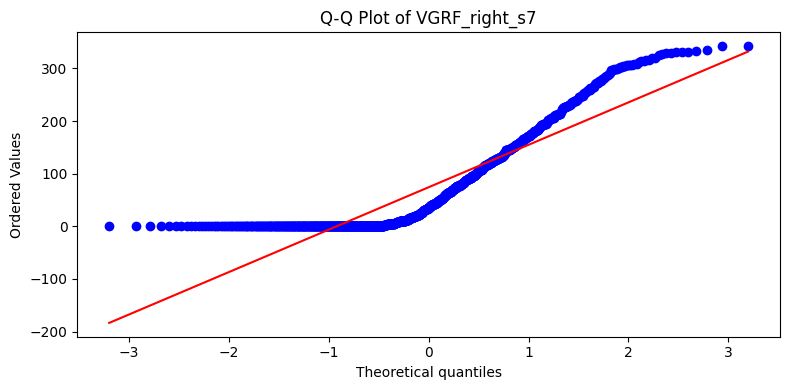

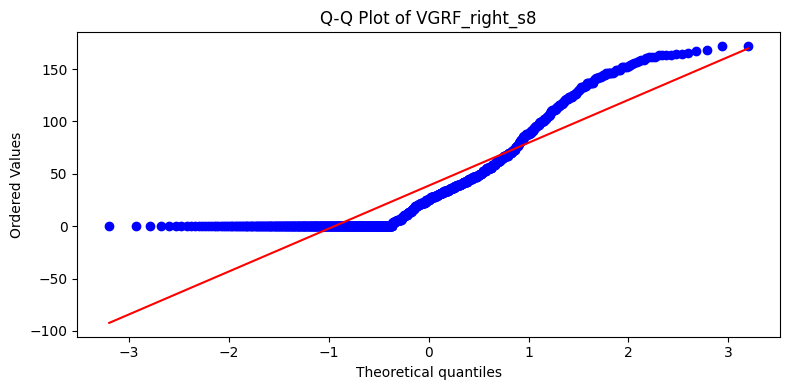

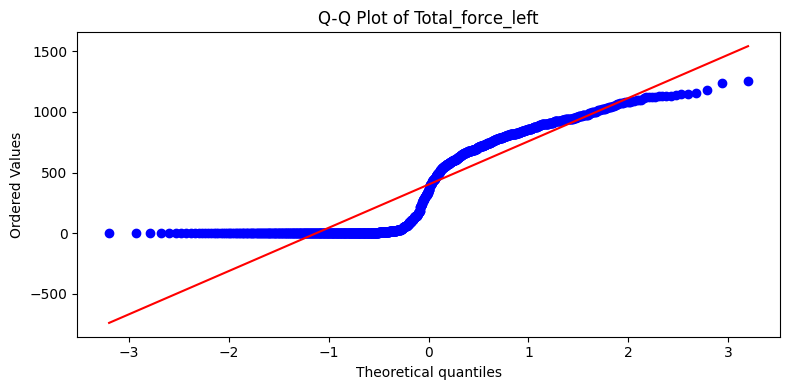

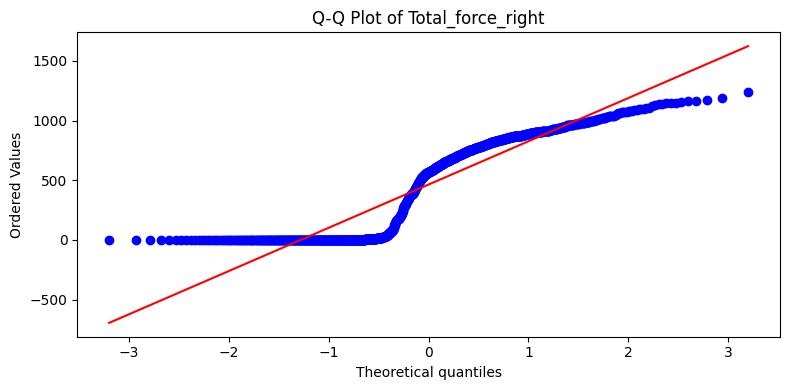

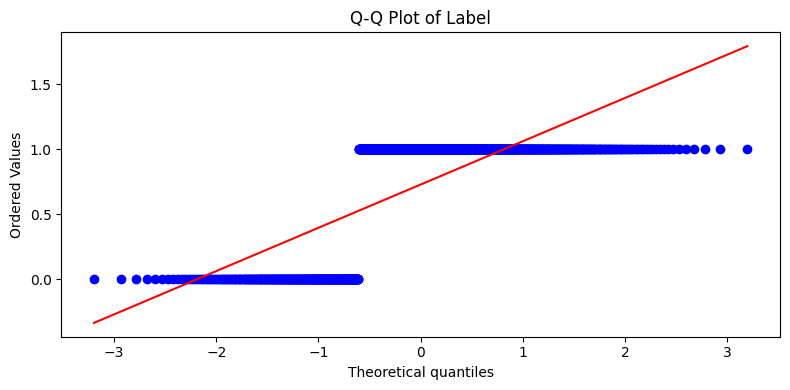

In [36]:
for column in sample_df.columns:
    plt.figure(figsize=(8, 4))
    stats.probplot(sample_df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(sample_df, hue='Label', height=3, aspect=1.5)  
plt.title('Pair Plot of Features')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>